# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [4]:
api_key = weather_api_key
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

count_one = 0
set_one = 1

print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=a0e3ed88883b4a8608a56fd11ce329df&units=imperial&q=


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
print ("Beginning Data Retrieval\n-------------------------------")

city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | vardo
Processing Record 3 of Set 1 | esperance
City not found. Skipping...
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | vytegra
Processing Record 7 of Set 1 | bac lieu
City not found. Skipping...
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | vila velha
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | sungaipenuh
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | binzhou
Processing Record 14 of Set 1 | varberg
Processing Record 15 of Set 1 | victoria
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | zhigansk
Processing Record 18 of Set 1 | hermanus
City not found. Skipping...
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | nokaneng
City not found. Skipping...
Processing Record 21 o

Processing Record 38 of Set 4 | palasa
Processing Record 39 of Set 4 | larap
Processing Record 40 of Set 4 | liverpool
Processing Record 41 of Set 4 | srednekolymsk
Processing Record 42 of Set 4 | carballo
Processing Record 43 of Set 4 | egvekinot
Processing Record 44 of Set 4 | olovyannaya
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | mareeba
Processing Record 47 of Set 4 | svetlogorsk
Processing Record 48 of Set 4 | torbay
Processing Record 49 of Set 4 | oktyabrskoye
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | vikindu
Processing Record 3 of Set 5 | san jose
Processing Record 4 of Set 5 | lakes entrance
Processing Record 5 of Set 5 | morristown
Processing Record 6 of Set 5 | zeya
Processing Record 7 of Set 5 | saint-pierre
Processing Record 8 of Set 5 | upernavik
Processing Record 9 of Set 5 | sao joao da barra
Processing Record 10 of Set 5 | provideniya
Processing Record 11 of Set 5 | touros
Processing Record 12 of Set 5 | isab

Processing Record 31 of Set 8 | yar-sale
Processing Record 32 of Set 8 | noumea
Processing Record 33 of Set 8 | cape canaveral
Processing Record 34 of Set 8 | kushmurun
Processing Record 35 of Set 8 | korla
Processing Record 36 of Set 8 | crab hill
Processing Record 37 of Set 8 | kargopol
Processing Record 38 of Set 8 | owando
Processing Record 39 of Set 8 | southbridge
Processing Record 40 of Set 8 | marzuq
Processing Record 41 of Set 8 | waipawa
Processing Record 42 of Set 8 | pacific grove
Processing Record 43 of Set 8 | pontes e lacerda
Processing Record 44 of Set 8 | vilhena
City not found. Skipping...
Processing Record 45 of Set 8 | talnakh
Processing Record 46 of Set 8 | ulladulla
Processing Record 47 of Set 8 | mana
Processing Record 48 of Set 8 | padang
Processing Record 49 of Set 8 | batsfjord
Processing Record 1 of Set 9 | colonia leopoldina
Processing Record 2 of Set 9 | pauini
City not found. Skipping...
Processing Record 3 of Set 9 | beira
City not found. Skipping...
Proc

Processing Record 13 of Set 12 | kargasok
Processing Record 14 of Set 12 | san policarpo
Processing Record 15 of Set 12 | mindelheim
Processing Record 16 of Set 12 | barcelos
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = {
    "City": city_two,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humidities,
    "Lat": lats,
    "Lng": lngs,
    "Max Temp": max_temps,
    "Wind Speed": wind_speeds
}
weather_dict

{'City': ['avarua',
  'vardo',
  'esperance',
  'kapaa',
  'hilo',
  'vytegra',
  'bac lieu',
  'punta arenas',
  'vila velha',
  'port alfred',
  'sungaipenuh',
  'hobart',
  'binzhou',
  'varberg',
  'victoria',
  'rikitea',
  'zhigansk',
  'hermanus',
  'new norfolk',
  'nokaneng',
  'bilibino',
  'klyuchi',
  'cockburn town',
  'busselton',
  'ushuaia',
  'faya',
  'irmo',
  'meulaboh',
  'thompson',
  'bambous virieux',
  'cherskiy',
  'shelburne',
  'bonito',
  'castro',
  'arraial do cabo',
  'yulara',
  'srandakan',
  'vaini',
  'mahebourg',
  'chuy',
  'chokurdakh',
  'richards bay',
  'lasa',
  'fortuna',
  'anchorage',
  'mar del plata',
  'caravelas',
  'warrnambool',
  'tiksi',
  'kavaratti',
  'khatanga',
  'jamestown',
  'karpogory',
  'camabatela',
  'wynyard',
  'caluquembe',
  'butaritari',
  'santa maria',
  'gizo',
  'atambua',
  'tessalit',
  'qarqin',
  'mataura',
  'port elizabeth',
  'cape town',
  'airai',
  'albany',
  'nikolskoye',
  'yellowknife',
  'saint-f

In [7]:
weather_df = pd.DataFrame(weather_dict)
weather_df

# Save as CSV.

weather_df.to_csv("weather_df.csv")
weather_draft = pd.read_csv("weather_df.csv")
weather = weather_draft.drop(columns=['Unnamed: 0'])
weather

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,avarua,100,CK,1594001152,83,-21.21,-159.78,69.80,8.05
1,vardo,94,NO,1594001152,94,70.37,31.11,48.43,8.23
2,esperance,90,AU,1594001152,47,-33.87,121.90,59.00,19.46
3,kapaa,1,US,1594001152,70,22.08,-159.32,84.20,8.05
4,hilo,90,US,1594001152,61,19.73,-155.09,82.40,9.17
...,...,...,...,...,...,...,...,...,...
550,lompoc,0,US,1594001222,60,34.64,-120.46,68.00,12.75
551,kargasok,100,RU,1594001222,80,59.06,80.86,65.66,4.56
552,san policarpo,100,ML,1594001205,62,13.30,-4.90,83.34,3.89
553,mindelheim,8,DE,1594001223,82,48.05,10.48,64.99,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

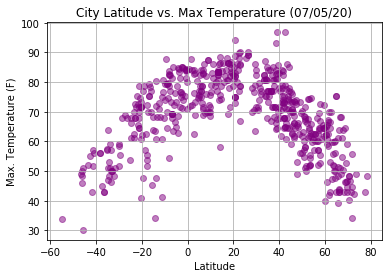

In [19]:
plt.scatter(weather["Lat"], weather["Max Temp"], c='purple', alpha=0.5)
plt.title("City Latitude vs. Max Temperature (07/05/20)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
#plt.show()

plt.savefig("Latitude vs. Temperature Plot.png")

#### Latitude vs. Humidity Plot

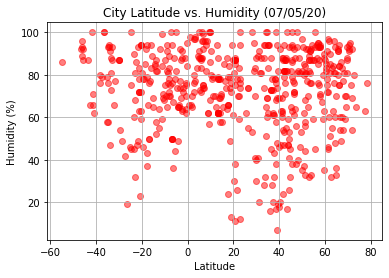

In [21]:
plt.scatter(weather["Lat"], weather["Humidity"], c='red', alpha=0.5)
plt.title("City Latitude vs. Humidity (07/05/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
#plt.show()

plt.savefig("Latitude vs. Humidity Plot.png")

#### Latitude vs. Cloudiness Plot

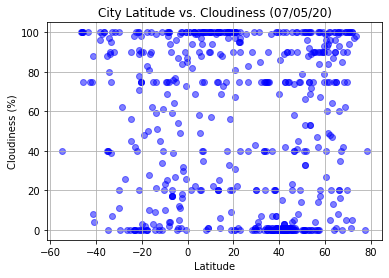

In [23]:
plt.scatter(weather["Lat"], weather["Cloudiness"], c='blue', alpha=0.5)
plt.title("City Latitude vs. Cloudiness (07/05/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
#plt.show()

plt.savefig("Latitude vs. Cloudiness.png")

#### Latitude vs. Wind Speed Plot

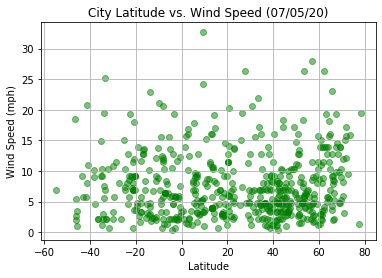

In [25]:
plt.scatter(weather["Lat"], weather["Wind Speed"], c='green', alpha=0.5)
plt.title("City Latitude vs. Wind Speed (07/05/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
#plt.show()

plt.savefig("Latitude vs. Wind Speed.png")

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [27]:
# Create Northern and Southern Hemisphere DataFrames

northern = weather.loc[weather["Lat"]>=0]
southern = weather.loc[weather["Lat"]<0]

northern.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,vardo,94,NO,1594001152,94,70.37,31.11,48.43,8.23
3,kapaa,1,US,1594001152,70,22.08,-159.32,84.20,8.05
4,hilo,90,US,1594001152,61,19.73,-155.09,82.40,9.17
5,vytegra,99,RU,1594001153,91,61.01,36.45,60.89,10.98
6,bac lieu,0,RS,1594001153,93,45.39,19.24,63.00,6.93


In [28]:
southern.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,avarua,100,CK,1594001152,83,-21.21,-159.78,69.80,8.05
2,esperance,90,AU,1594001152,47,-33.87,121.90,59.00,19.46
9,port alfred,17,CD,1594001153,50,-7.03,29.76,69.17,6.46
10,sungaipenuh,30,ID,1594001153,74,-2.08,101.38,73.94,1.99
11,hobart,75,AU,1594001043,66,-42.88,147.33,55.00,5.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.46x + 87.9
The r-squared is: -0.7365032905617045


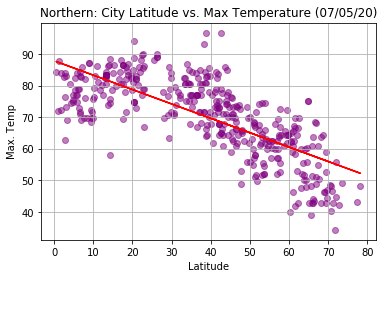

In [39]:
plt.title("Northern: City Latitude vs. Max Temperature (07/05/20)")
plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.grid()

#Plot the regression line
x_values = northern['Lat']
y_values = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='purple', alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(line_eq)
print(f"The r-squared is: {rvalue}")
#plt.show()

plt.savefig("Northern: Latitude vs. Temperature Plot.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.73x + 79.58
The r-squared is: 0.7395961684752854


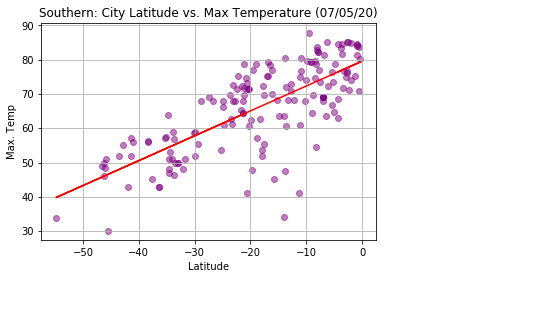

In [40]:
plt.title("Southern: City Latitude vs. Max Temperature (07/05/20)")
plt.ylabel("Max. Temp")
plt.xlabel("Latitude")
plt.grid()

#Plot the regression line
x_values = southern['Lat']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='purple', alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(line_eq)
print(f"The r-squared is: {rvalue}")
#plt.show()

plt.savefig("Southern: Latitude vs. Temperature Plot.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.02x + 73.11
The r-squared is: -0.023303356883393005


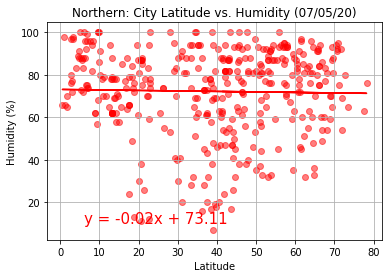

In [48]:
plt.title("Northern: City Latitude vs. Humidity (07/05/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

#Plot the regression line
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='red', alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(line_eq)
print(f"The r-squared is: {rvalue}")
#plt.show()

plt.savefig("Northern: Latitude vs. Humidity Plot.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = -0.16x + 70.9
The r-squared is: -0.12403037877051018


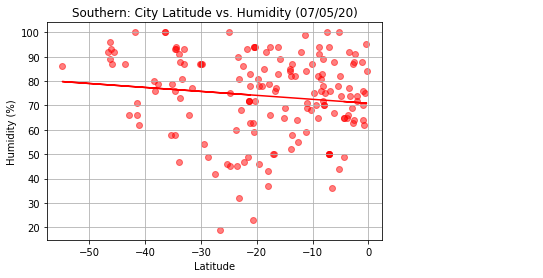

In [47]:
plt.title("Southern: City Latitude vs. Humidity (07/05/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

#Plot the regression line
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='red', alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(line_eq)
print(f"The r-squared is: {rvalue}")
#plt.show()

plt.savefig("Southern: Latitude vs. Humidity Plot.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.25x + 62.98
The r-squared is: -0.1192701748005765


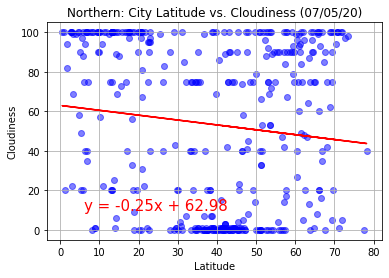

In [50]:
plt.title("Northern: City Latitude vs. Cloudiness (07/05/20)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()

#Plot the regression line
x_values = northern['Lat']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='blue', alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(line_eq)
print(f"The r-squared is: {rvalue}")
#plt.show()

plt.savefig("Northern: Latitude vs. Cloudiness Plot.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = -0.53x + 44.32
The r-squared is: -0.1801761655281844


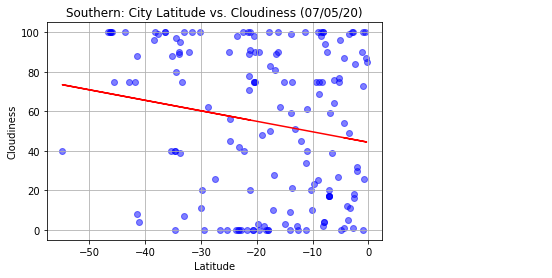

In [51]:
plt.title("Southern: City Latitude vs. Cloudiness (07/05/20)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()

#Plot the regression line
x_values = southern['Lat']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='blue', alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(line_eq)
print(f"The r-squared is: {rvalue}")
#plt.show()

plt.savefig("Southern: Latitude vs. Cloudiness Plot.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.02x + 6.63
The r-squared is: 0.08717717911654145


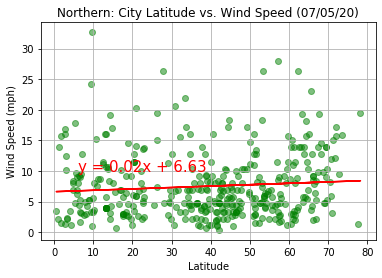

In [54]:
plt.title("Northern: City Latitude vs. Wind Speed (07/05/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

#Plot the regression line
x_values = northern['Lat']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='green', alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(line_eq)
print(f"The r-squared is: {rvalue}")
#plt.show()

plt.savefig("Northern: Latitude vs. Wind Speed Plot.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.03x + 6.93
The r-squared is: -0.06677535118767261


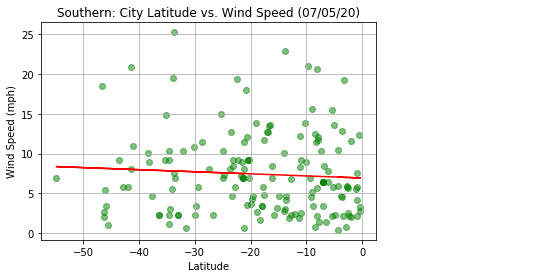

In [56]:
plt.title("Southern: City Latitude vs. Wind Speed (07/05/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

#Plot the regression line
x_values = southern['Lat']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='green', alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

print(line_eq)
print(f"The r-squared is: {rvalue}")
#plt.show()

plt.savefig("Southern: Latitude vs. Wind Speed Plot.png")

Three Observations:
    
    Highest range of temperature is found around latitude of 20-40, and it decreases towards poles 
    
    Cloudiness data is evenly spreaded over latitudes 
    
    Very weak correlation between humidity and latitude